# 6.4 주성분 분석(Principal Component Analysis)

주성분 분석은 고차원의 데이터를 저차원의 데이터로 환원시키는 기법을 말한다. 

 

데이터의 분산이 최대한 보존되도록 하는 저차원 초평면을 찾아 데이터를 투영한다.

보스턴 데이터를 불러와서 PCA적용해보자. 

In [8]:
from sklearn import datasets
import pandas as pd
data =  datasets.load_boston()

0,1,2 column 데이터에 대해서 진행해보자. 

In [9]:
pca_data = data["data"][:,0:3]

In [10]:
pca_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01]])

위의 데이터에 대하여 3차원 산점도를 그려보자. 

In [11]:
import matplotlib.pyplot as plt

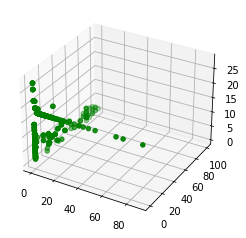

In [12]:
ax = plt.axes(projection ="3d")
ax.scatter3D(pca_data[:,0], pca_data[:,1], pca_data[:,2], color = "green")

주어진 데이터에 대하여 PCA를 이용해서 2차원 데이터로 축소해보자. 

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

In [14]:
pca_result = pca.fit_transform(pca_data)

In [16]:
pca_result

array([[  8.31179776,  -5.42376592],
       [-10.15956884,  -6.34052205],
       [-10.15956706,  -6.34054063],
       ...,
       [-10.9741103 ,  -4.64744388],
       [-10.97846141,  -4.60208819],
       [-10.97292072,  -4.65984402]])

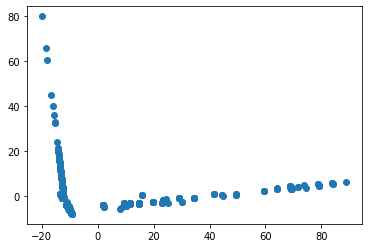

In [17]:
plt.scatter(pca_result[:,0],pca_result[:,1])

앞에서의 보스턴 데이터에 대하여, 주성분 분석(PCA)를 이용해서 저차원으로 투영한 후 회귀모형을 학습해보자. 

In [18]:
data["data"].shape

(506, 13)

In [19]:
pca = PCA(n_components=7)
pca_result = pca.fit_transform(data["data"])

In [20]:
pca_result.shape

(506, 7)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 

In [22]:
train_x,test_x,train_y,test_y = train_test_split(pca_result,data["target"],random_state=15)

In [23]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [24]:
model = LinearRegression()
model.fit(train_x_minmax,train_y)

LinearRegression()

In [25]:
model.score(train_x_minmax,train_y)

0.5946181498120489

In [26]:
model.score(test_x_minmax,test_y)

0.562764379459314

차원축소를 하기 전보다 성능이 안좋아진 것을 확인할 수 있다.

이는, 성능을 평가하는 결정계수가 변수 차원이 줄어들수록 줄어드는 성질이 있기 때문이다.

#### 수정된 결정계수

$R_{adj}^{2}=1-(1-R^{2}){(n-1)\over  n-p-1}$

n = data 개수
p = 변수 개수

위에서의 수정된 결정계수를 이용해서 모형성능을 평가해보자. 

In [27]:
1-(1-model.score(test_x_minmax,test_y))*(len(test_x_minmax)-1)/(len(test_x_minmax)-7-1)

0.5370446370745678

# 6.5 다차원 척도법(MDS) 

다차원 척도법은 데이터들간의 거리가 비슷한 저차원으로 투영하는 방법이다. 

6.4에서의 보스턴 데이터의 0,1,2 컬럼을 바탕으로 진행해보자. 

In [28]:
mds_data =  data["data"][:,0:3]

In [29]:
from sklearn.manifold import MDS

In [30]:
embedding = MDS(n_components=2)

In [31]:
X_transformed = embedding.fit_transform(mds_data)

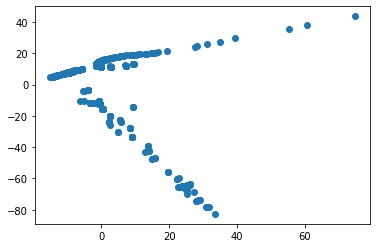

In [32]:
plt.scatter(X_transformed [:,0], X_transformed [:,1])

### 문제6.6 

MDS를 이용해서 보스턴데이터를 7차원으로 줄인다음 다중회귀모형을 학습시켜라. 

In [33]:
mds = MDS(n_components=7)
x_transformed = mds.fit_transform(mds_data)
x_transformed

array([[ 8.62019065, -1.14545038,  1.89136169, ..., -2.67445486,
        -3.34169631,  2.66793437],
       [-1.57765493, -7.16290636,  6.12988109, ...,  6.06590612,
        -0.76903892,  2.62588283],
       [-1.58760505, -7.16377326,  6.12366754, ...,  6.08354719,
        -0.76718972,  2.64517477],
       ...,
       [-4.85967595, -4.07089099,  4.75099992, ...,  6.46831764,
        -0.90021741,  2.03611981],
       [-4.86491288, -4.07443144,  4.76989988, ...,  6.47132638,
        -0.87507344,  1.96723813],
       [-4.84670789, -4.05532906,  4.77308342, ...,  6.49246688,
        -0.9181948 ,  2.0058473 ]])

# 6.6 t-SNE

t-분포 를 이용해서 차원축소하는 방법이다. 

In [34]:
tsne_data = data["data"][:,0:3]

In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne= TSNE(n_components=2)

In [37]:
X_transformed = tsne.fit_transform(tsne_data)

In [40]:
X_transformed.shape

(506, 2)

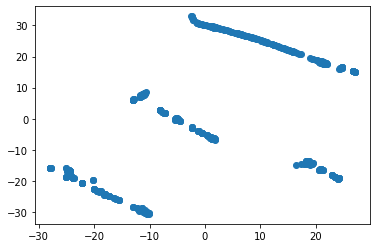

In [38]:
plt.scatter(X_transformed[:,0],X_transformed[:,1])

### 문제6.7 

t-SNE 를 이용해서 보스턴데이터를 3차원으로 줄인다음 다중회귀모형을 학습시켜라. 

In [43]:
t_sne= TSNE(n_components=3)
x_transformed = t_sne.fit_transform(tsne_data)
x_transformed.shape

(506, 3)